# **Welcome to Telco Customer Churn -  Exploratory Data Analysis**
###### Project by Louisa Veronica

### **Business Understanding**
Perusahaan bernama Telco merupakah perusahaan telekomunikasi yang menyediakan layanan telepon dan internet. Perusahaan ingin mencari tahu customer mana yang telah churn dan layanan apa yang menjadi penyebanya.

Churn sendiri berarti customer yang berhenti ataupun tidak lagi membayar untuk menggunakan layanan yang disediakan oleh perusahaan.


### **Preliminary**
*   Objective Statement:
    *   Mendapatkan business insight untuk mengetahui customer mana yang churn dan tidak churn
    *   Mendapatkan business insight untuk mengetahui service apa yang menjadi penyebab customer churn
    *   Mendapatkan business insight dengan menjawab pertanyaan sebagai berikut:
        1. Berapa jumlah customer yang join phone service dan internet service berdasarkan tipenya?
        2. Berapakah rata - rata pembayaran per bulan per tipe internet service?
        3. Berapakah rata - rata pembayaran per bulan per senior citizen dan non senior citizen yang churn dan tidak churn?
    
*   Challenges:
    *   Jumlah data yang besar
    *   Adanya white space
    *   Adanya kolom dengan tipe data yang tidak sesuai
   
*   Methodology/Analytic Technique:
    *   Exploratory Data Analysis
    *   Deep-Dive Exploration

*   Business Benefit:
    *   Mencegah customer untuk churn

*   Expected Outcomes: 
    * Mengetahui customer mana yang churn dan tidak churn
    * Mengetahui service apa yang menjadi penyebab customer churn
    * Rekomendasi bisnis


### **Data Understanding**
*   Sumber data: Telco Customer Churn yang berasal dari Kaggle, yang dapat diakses melalui link sebagai berikut:
https://www.kaggle.com/blastchar/telco-customer-churn

*   Data detail:
    *   customerID: ID customer
    *   gender: jenis kelamin customer
    *   SeniorCitizen: apakah customer termasuk senior citizen atau tidak
    *   Partner: apakah customer memiliki partner atau tidak
    *   Dependents: apakah customer memiliki dependents atau tidak
    *   tenure: berapa lama customer telah bergabung dengan perusahaan (dalam jumlah bulan)
    *   PhoneService: apakah customer join phone service atau tidak
    *   MultipleLines: apakah customer join multiple lines service (beberapa line telepon) atau tidak
    *   InternetService: internet service provider yang digunakan
    *   OnlineSecurity: apakah customer join online security atau tidak
    *   DeviceProtection: apakah customer join device protection atau tidak
    *   TechSupport: apakah customer join tech support atau tidak
    *   StreamingTV: apakah customer join streaming TV atau tidak
    *   StreamingMovies: apakah customer join streaming movies atau tidak
    *   Contract: jangka waktu contract customer
    *   PaperlessBilling: apakah customer menggunakan paperless billing atau tidak
    *   PaymentMethod: metode pembayaran customer
    *   MonthlyCharges: jumlah yang ditagihkan pada customer setiap bulan
    *   TotalCharges: total jumlah yang telah ditagihkan pada customer
    *   Churn: apakah customer akan churn atau tidak



### **Data Preparation**

#### Import Package

In [ ]:
#Import Warning
import warnings
warnings.filterwarnings('ignore')

#Import Package yang Digunakan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Load Dataset

In [ ]:
#Upload Data
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#Mengecek Jumlah Data
df.shape

(7043, 21)

### **Pre-Processing**

In [ ]:
#Melihat Informasi Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#Melihat Isi Data untuk Senior Citizen karena Memiliki Tipe Data yang Kurang Sesuai
df["SeniorCitizen"].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [ ]:
#Melihat Isi Data untuk TotalCaharges karena Memiliki Tipe Data yang Kurang Sesuai
df["TotalCharges"].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

Observation:
1. Data memiliki 21 kolom dengan 7043 baris
2. Terdapat 18 kolom yang bertipe data Categorical dan 3 kolom yang bertipe data Numerical
3. Data terlihat memiliki tipe data yang sesuai dengan kolomnya, kecuali untuk SeniorCitizen yang seharusnya berupa Categorical (karena isi data adalah 1 dan 0 saja), tetapi disave berupa angka dan TotalCharges yang seharusnya berupa float, tetapi disave berupa object

Berdasarkan observation di atas, akan dilakukan perubahan tipe data untuk TotalCharges saja karena TotalCharges tidak dapat dianalisa apabila tidak dilakukan perubahan tipe data.

Namun, terdapat error message yang muncul pada saat menjalankan kode untuk mengubah tipe data. Hal ini mengindikasikan adanya white space pada TotalCharges. Dengan demikian, sebelum mengubah tipe data, harus mengatasi white space terlebih dahulu.

In [ ]:
#Menghilangkan Baris yang Kolom TotalChargesnya mengandung White Space
df = df.loc[~df['TotalCharges'].str.contains(' ')]

#Mengubah Tipe Data TotalCharges menjadi Float
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [ ]:
#Mengecek Kembali Informasi Data Setelah Dilakukan Pemrosesan
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


Observation:
1. Setelah dilakukan pre-processing, data memiliki 21 kolom dengan 7032 baris (dari yang semula terdiri atas 7043 baris)
2. Terdapat 17 kolom yang bertipe data Categorical dan 4 kolom yang bertipe data Numerical
3. Data telah memiliki tipe data yang sesuai dengan kolomnya, kecuali untuk SeniorCitizen yang seharusnya berupa Categorical. Akan tetapi, karena tujuan dari analisa adalah untuk exploratory data analysis, yang mana tidak terdapat masalah apabila tidak mengubah tipe data, maka kolom tersebut tetap dibiarkan sesuai aslinya

### **Perform Standard Data Cleaning**

####**Missing Value**

In [ ]:
#Mengecek Adanya Missing Value
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Observation:
1. Data tidak memiliki missing value

####**Duplicate**

In [ ]:
#Mengecek Adanya Duplikat Data
df.duplicated().sum()

0

Observation:
1. Data tidak memiliki duplicate

### **Perform Standard EDA with Rich Interpretations**

#### **Statistical Summary**

In [ ]:
#Mengelompokkan Kolom
Numerical = ["tenure","MonthlyCharges","TotalCharges"]
CategoricalUser = ["gender","SeniorCitizen","Partner","Dependents"]
CategoricalService = ["PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup",
                      "DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
CategoricalAccount = ["Contract","PaperlessBilling","PaymentMethod"]

Bedasarkan kolom yang tersedia, akan lebih mudah untuk dianalisa apabila kolom tersebut dikategorikan menjadi sebagai berikut:
1. Numerical berisikan kolom dengan tipe data numeric saja
2. CategoricalUser berisikan kolom mengenai profile customer (gendernya apa, senior citizen atau bukan, memiliki partner atau dependendents tidak)
3. CategoricalService berisikan kolom mengenai service apa saja yang dimiliki oleh perusahaan (phone service, internet service, dan macam - macam additional service)
4. CategoricalAccount berisikan kolom dengan contract, billing, dan metode pembayaran customer pada perusahaan

Selain itu, terdapat kolom Churn yang merupakan target variable

In [ ]:
#Statistical Summary untuk Numerical Data
df[Numerical].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


Observation:
1. Mean > 50% (Median) pada tenure dan TotalCharges mengindikasikan bahwa kedua kolom tersebut memiliki positive skewed distribution
2. Mean < 50% (Median) pada MonthlyCharges mengindikasikan bahwa kolom tersebut memiliki negative skewed distribution
3. Rata - rata pelanggan telah bersama dengan perusahaan selama 32 bulan dengan rata - rata pembayaran per bulan adalah 64.8 dollar
4. Jika melihat pada nilai min saja, dapat diketahui bahwa TotalCharges = tenure * MonthlyCharges + Additional Charge yang tidak diketahui
5. Jika melihat pada nilai max saja, customer terloyal perusahaan telah bersama perusahaan selama 72 bulan (6 tahun) dan total revenue yang didapat mencapai 8684.8 dollar

In [ ]:
#Melihat Unique CategoricalUser
for col in CategoricalUser:
  print(col,"\n",df[col].describe(),"\n", df[col].value_counts(),"\n")

gender 
 count     7032
unique       2
top       Male
freq      3549
Name: gender, dtype: object 
 Male      3549
Female    3483
Name: gender, dtype: int64 

SeniorCitizen 
 count    7032.000000
mean        0.162400
std         0.368844
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SeniorCitizen, dtype: float64 
 0    5890
1    1142
Name: SeniorCitizen, dtype: int64 

Partner 
 count     7032
unique       2
top         No
freq      3639
Name: Partner, dtype: object 
 No     3639
Yes    3393
Name: Partner, dtype: int64 

Dependents 
 count     7032
unique       2
top         No
freq      4933
Name: Dependents, dtype: object 
 No     4933
Yes    2099
Name: Dependents, dtype: int64 



In [ ]:
#Melihat Unique CategoricalService
for col in CategoricalService:
  print(col,"\n",df[col].describe(),"\n", df[col].value_counts(),"\n")

PhoneService 
 count     7032
unique       2
top        Yes
freq      6352
Name: PhoneService, dtype: object 
 Yes    6352
No      680
Name: PhoneService, dtype: int64 

MultipleLines 
 count     7032
unique       3
top         No
freq      3385
Name: MultipleLines, dtype: object 
 No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64 

InternetService 
 count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object 
 Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64 

OnlineSecurity 
 count     7032
unique       3
top         No
freq      3497
Name: OnlineSecurity, dtype: object 
 No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64 

OnlineBackup 
 count     7032
unique       3
top         No
freq      3087
Name: OnlineBackup, dtype: object 
 No              

In [ ]:
#Melihat Unique CategoricalAccount
for col in CategoricalAccount:
  print(col,"\n",df[col].describe(),"\n", df[col].value_counts(),"\n")

Contract 
 count               7032
unique                 3
top       Month-to-month
freq                3875
Name: Contract, dtype: object 
 Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64 

PaperlessBilling 
 count     7032
unique       2
top        Yes
freq      4168
Name: PaperlessBilling, dtype: object 
 Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64 

PaymentMethod 
 count                 7032
unique                   4
top       Electronic check
freq                  2365
Name: PaymentMethod, dtype: object 
 Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64 



In [ ]:
#Melihat Unique Churn
print("Churn","\n",df["Churn"].describe(),"\n", df["Churn"].value_counts(),"\n")

Churn 
 count     7032
unique       2
top         No
freq      5163
Name: Churn, dtype: object 
 No     5163
Yes    1869
Name: Churn, dtype: int64 



Observations:
1. Kolom gender, Partner, Dependents, Phone Service, dan PaperlessBilling, Churn memiliki 2 unique, yaitu Yes dan No, kecuali untuk gender yang terdiri atas Male dan Female
2. Seperti yang telah disebutkan di atas, kolom SeniorCitizen seharusnya diubah ke tipe data Categorical karena bernilai 1 dan 0, tetapi tercatat sebagai Numerical
3. Kolom MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract memiliki 3 unique, yaitu Yes, No, dan No internet service, kecuali untuk MultipleLines yang terdiri atas Yes, No, dan No phone Service, InternetService yang terdiri atas Fiber optic, DSL, dan No, dan Contract yang terdiri atas Month-to-month, Two year, dan One year
4. Kolom PaymentMethod memiliki 4 unique, yaitu Electronic check, Mailed check, Bank transfer (automatic), dan Credit Card (automatic)

#### **Univariate Analysis**

#####Bar Plot untuk Melihat Churn sebagai Target Variable

% Customer Churn are
 No     73.42
Yes    26.58
Name: Churn, dtype: float64


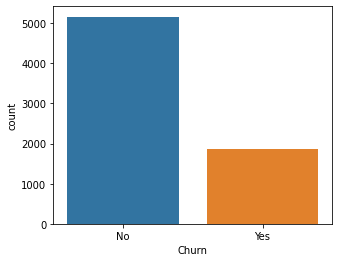

In [ ]:
#Membuat Bar Plot
plt.figure(figsize=(5,4))

ChurnBar = sns.countplot(df["Churn"])
print("% Customer Churn are\n", round(df.Churn.value_counts() / df.Churn.count()*100,2))

Observation:
1. Terdapat 73.42% customer yang tidak churn dan 26.58% customer yang churn. Meskipun jumlah customer yang churn jauh lebih sedikit apabila dibandingkan dengan customer yang tidak churn, churn sendiri sangatlah penting untuk dianalisa. Hal ini dikarenakan dengan adanya customer yang churn, maka revenue yang diperoleh oleh perusahaan akan berkurang. Selain itu, untuk mengganti customer yang churn dengan customer yang baru pun tidaklah semudah mempertahankan customer agar tidak churn.

#####Bar Plot untuk Mengetahui Distribusi Data Categorical

Value % of gender column
Male      50.47
Female    49.53
Name: gender, dtype: float64 

Value % of SeniorCitizen column
0    83.76
1    16.24
Name: SeniorCitizen, dtype: float64 

Value % of Partner column
No     51.75
Yes    48.25
Name: Partner, dtype: float64 

Value % of Dependents column
No     70.15
Yes    29.85
Name: Dependents, dtype: float64 



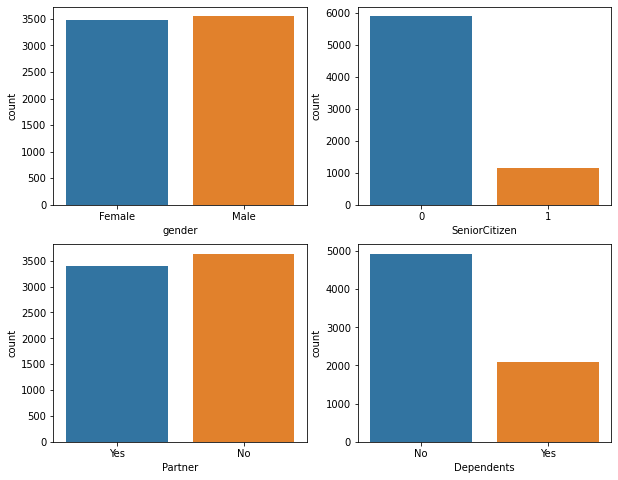

In [ ]:
#Memunculkan Percentage untuk Categorical User
for col in CategoricalUser:
  print(f"Value % of {col} column")
  print(round(df[col].value_counts()/len(df)*100,2),"\n")

#Membuat Bar Plot untuk Categorical User
plt.figure(figsize=(10,8))

for i,col in enumerate(CategoricalUser):    
    plt.subplot(2,2,i + 1)
    ax = sns.countplot(data = df, x = col)

Observation:
1. Jumlah customer male dan female berjumlah hampir sama banyak, yaitu hampir 50%
2. Sebanyak 16.24% customer adalah senior citizen (direpresentasikan dengan angka 1), sedangkan sebagian besar customer adalah orang yang lebih muda (non senior citizen, direpresentasikan dengan angka 0)
3. Jumlah customer yang memiliki dan tidak memiliki partner hampir sama
4. Sebanyak 30% customer memiliki dependents dan sisanya tidak memiliki dependents
5. Dapat dianalisa lebih lanjut mengenai hubungan antara Partner dan Dependents dan apakah dapat diasumsikan apabila memiliki partner sama dengan telah menikah dan apabila memiliki dependents berarti memiliki anak

Value % of PhoneService column
Yes    90.33
No      9.67
Name: PhoneService, dtype: float64 

Value % of MultipleLines column
No                  48.14
Yes                 42.19
No phone service     9.67
Name: MultipleLines, dtype: float64 

Value % of InternetService column
Fiber optic    44.03
DSL            34.36
No             21.62
Name: InternetService, dtype: float64 

Value % of OnlineSecurity column
No                     49.73
Yes                    28.65
No internet service    21.62
Name: OnlineSecurity, dtype: float64 

Value % of OnlineBackup column
No                     43.90
Yes                    34.49
No internet service    21.62
Name: OnlineBackup, dtype: float64 

Value % of DeviceProtection column
No                     44.00
Yes                    34.39
No internet service    21.62
Name: DeviceProtection, dtype: float64 

Value % of TechSupport column
No                     49.37
Yes                    29.01
No internet service    21.62
Name: TechSupport, dtype: f

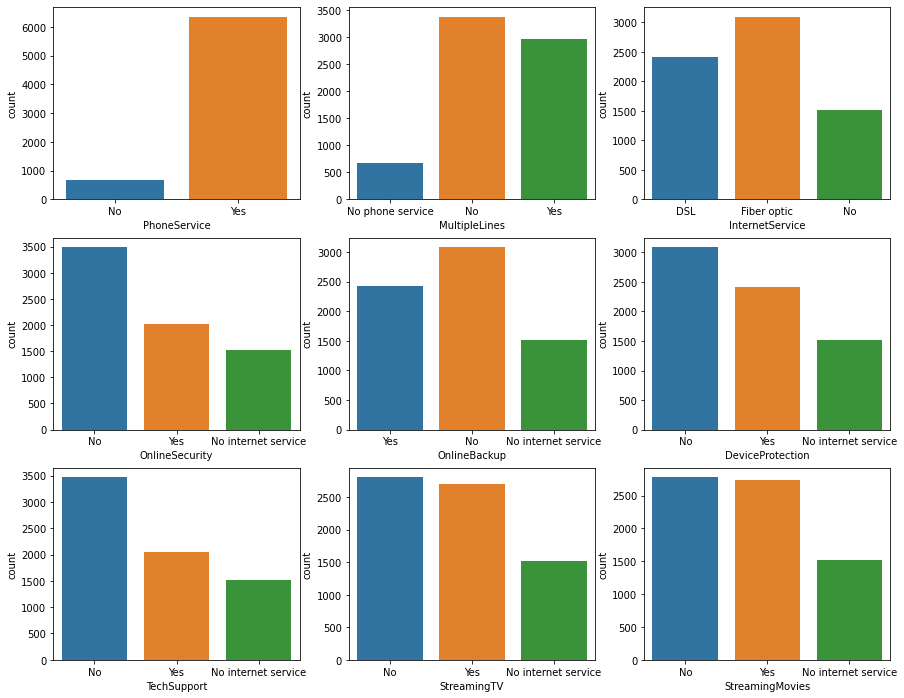

In [ ]:
#Memunculkan Percentage untuk Categorical Service
for col in CategoricalService:
  print(f"Value % of {col} column")
  print(round(df[col].value_counts()/len(df)*100,2),"\n")

#Membuat Bar Plot untuk Categorical Service
plt.figure(figsize=(15,12))

for i,col in enumerate(CategoricalService):    
    plt.subplot(3,3,i + 1)
    ax = sns.countplot(data = df, x = col)

Observation:
1. Sebanyak 90% customer join phone service dari perusahaan, dimana 42.19% di antaranya memiliki multiple lines
2. Sebanyak 44% customer join internet service dengan fiber optic, dan 34% join internet service dengan DSL, dan sisanya tidak join internet service. Bagi perusahaan, dapat dicari lebih dalam alasan mengapa customer tidak join internet service karena jumlahnya cukup banyak, yaitu sekitar 22%
3. Kurang lebih hanya 30% - 35% customer yang join additional service (online security, online backup, device protection, dan tech support) yang ditawarkan oleh perusahaan. Sementara sebanyak kurang lebih 38% customer join streaming TV dan streaming movies.

Value % of Contract column
Month-to-month    55.11
Two year          23.96
One year          20.93
Name: Contract, dtype: float64 

Value % of PaperlessBilling column
Yes    59.27
No     40.73
Name: PaperlessBilling, dtype: float64 

Value % of PaymentMethod column
Electronic check             33.63
Mailed check                 22.81
Bank transfer (automatic)    21.93
Credit card (automatic)      21.63
Name: PaymentMethod, dtype: float64 



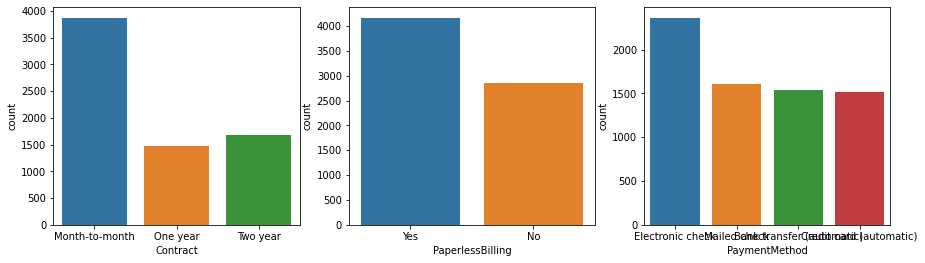

In [ ]:
#Memunculkan Percentage untuk Categorical Account
for col in CategoricalAccount:
  print(f"Value % of {col} column")
  print(round(df[col].value_counts()/len(df)*100,2),"\n")

#Membuat Bar Plot untuk Categorical Account
plt.figure(figsize=(15,4))

for i,col in enumerate(CategoricalAccount):    
    plt.subplot(1,3,i + 1)
    ax = sns.countplot(data = df, x = col)

Observations:
1. Lebih dari setengah customer memiliki contract month-to-month dengan perusahaan, sedangkan sisanya terbagi antara pemilik contract 1 atau 2 tahun
2. Hampir 60% dari customer memilih paperless billing, sedangkan sebanyak 40% sisanya masih memilih untuk dikirimkan kertas tagihan
3. Sebanyak kurang lebih 30% customer memilih sistem pembayaran dengan electronic check, sedangkan sisanya terbagi hampir sama rata memilih sistem pembayaran dengan mailed check, bank transfer (automatic), dan credit card (automatic)

#####Box Plot untuk Mendeteksi Outlier

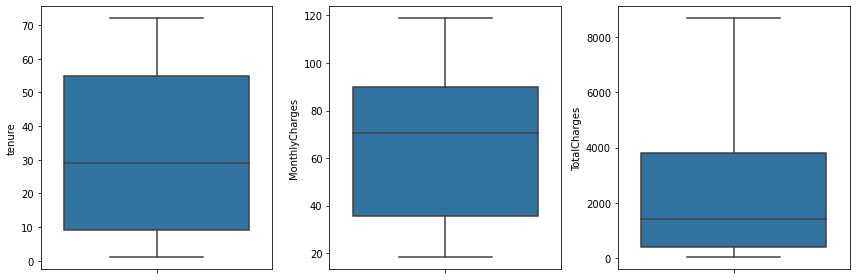

In [ ]:
#Membuat Boxplot
plt.figure(figsize=(12,4))

features = Numerical
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]])
    plt.tight_layout()

Observation:
1. Data tidak memiliki outlier
2. Nilai min, max, median, etc telah disebutkan di atas

#####KDE Plot untuk Mengetahui Distribusi Data Numerical

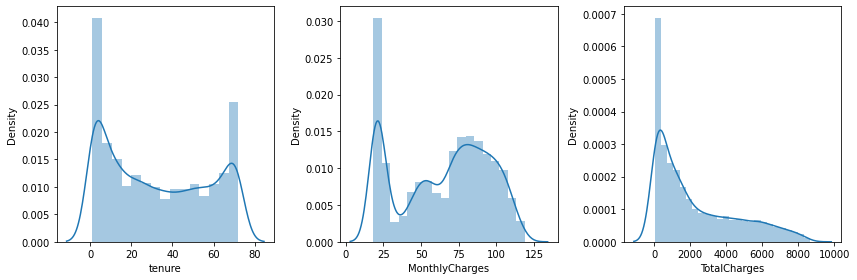

In [ ]:
#Membuat KDE Plot
plt.figure(figsize=(12,4))

features = Numerical
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.distplot(x=df[features[i]])
    plt.xlabel(features[i])
    plt.tight_layout()

Observation:
1. Jika melihat pada tenure, sebagian besar customer masih baru saja bergabung dengan perusahaan. Di samping itu, terdapat cukup banyak customer yang loyal, yaitu customer yang telah bersama dengan perusahaan selama kurang lebih 6 tahun (72 bulan). Bagi perusahaan, dapat dianalisa lebih lanjut dengan melihat hubungan dengan contract yang diambil
2. Kebanyakan customer yang bergabung menghasilkan revenue per bulan pada nilai minimal, yaitu $18.25. Hal ini kemungkinan terjadi karena seperti yang kita lihat pada Univariate Analysis, sebagian besar customer tidak join additional service.
3. Sama halnya dengan MonthlyCharges, perusahaan kebanyakan memperoleh revenue minimal dari customer 


#### **Bivariate / Multivariate Analysis**

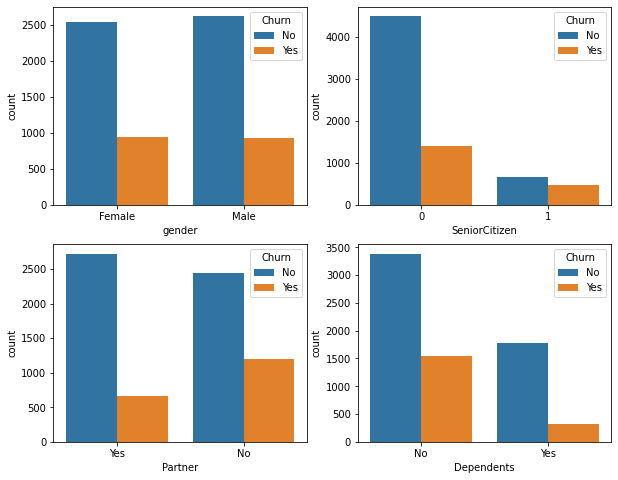

In [ ]:
#Melihat Hubungan Churn dengan CategoricalUser
plt.figure(figsize=(10,8))

for i,col in enumerate(CategoricalUser):    
    plt.subplot(2,2,i + 1)
    ax = sns.countplot(data = df, x = col, hue = "Churn")

Observations:
1. Gender tidak berpengaruh terhadap churn. Hal ini dikarenakan jumlah dan percentage male dan female yang churn kurang lebih hampir sama
2. Secara percentage, senior citizen yang churn lebih banyak apabila dibandingkan dengan non senior citizen
3. Customer yang single lebih banyak yang churn apabila dibandingkan dengan customer yang memiliki partner
4. Customer yang tidak memiliki dependents lebih banyak yang churn apabila dibandingkan dengan customer yang memiliki dependents

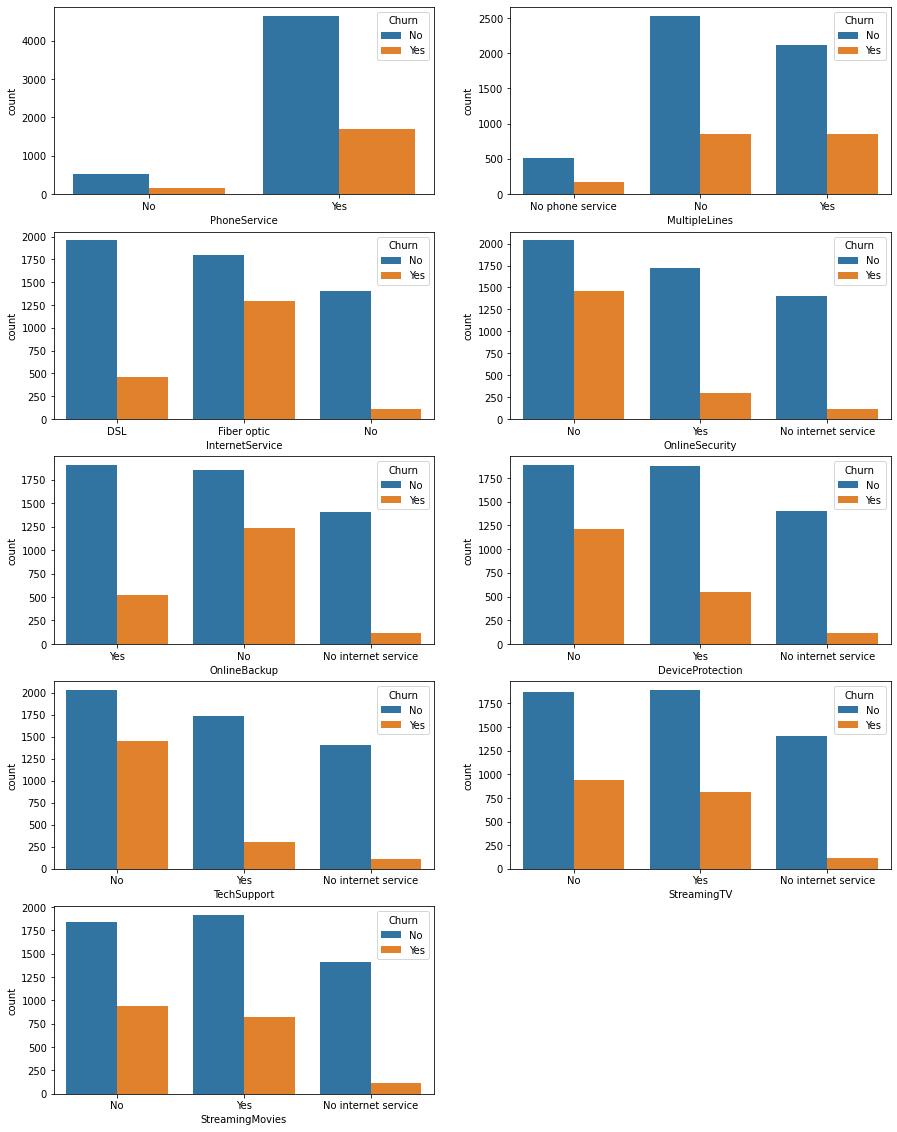

In [ ]:
#Melihat Hubungan Churn dengan CategoricalService
plt.figure(figsize=(15,20))

for i,col in enumerate(CategoricalService):    
    plt.subplot(5,2,i + 1)
    ax = sns.countplot(data = df, x = col, hue = "Churn")

Observation:
1. Secara keseluruhan, jumlah customer yang tidak menggunakan phone service lebih sedikit apabila dibandingkan dengan jumlah customer yang tidak menggunakan internet service. Selain itu, jumlah customer yang akan churn pada phone service juga tidak sebanyak jumlah customer yang akan churn pada internet service
2. Customer yang tidak join internet service kebanyakan tidak churn. Secara lebih spesifik, customer yang churn sebagian besar adalah customer yang menggunakan internet service dengan fiber optic, sedangkan customer yang menggunakan internet service dengan DSL memiliki tingkat churn yang lebih rendah
3. Untuk additional service (online security, online backup, device protection, dan tech support) sendiri, juga memiliki percentage churn yang lebih kecil bila dibandingkan service utamanya (internet service)
4. Untuk additional service (streaming TV dan streaming movies, keduanya memiliki nilai yang hampir sama antara customer yang churn dan tidak churn. Dengan demikian, dapat disimpulkan bahwa streaming TV dan streaming movies tidak dapat digunakan untuk menentukan tingkat churn
5. Additional service dapat dipertimbangkan untuk dipromosikan lebih lanjut karena masih banyak customer yang belum join additional service dan terlebih customer churn dari additional service tidak sebanyak customer churn pada service utama

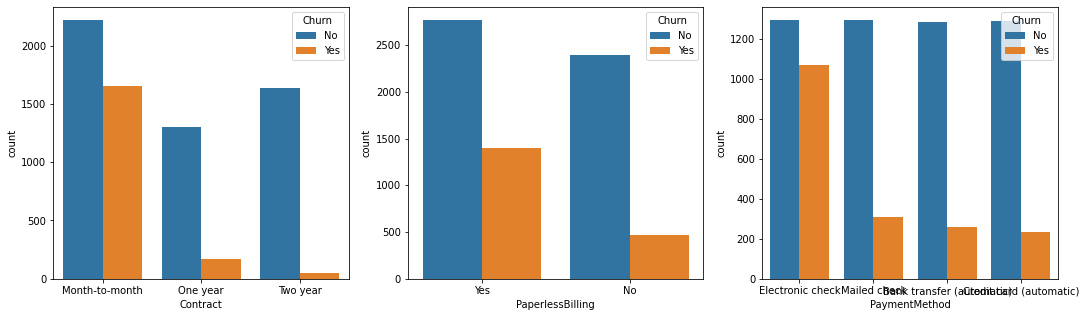

In [ ]:
#Melihat Hubungan Churn dengan CategoricalAccount
plt.figure(figsize=(18,5))

for i,col in enumerate(CategoricalAccount):    
    plt.subplot(1,3,i + 1)
    ax = sns.countplot(data = df, x = col, hue = "Churn")

Observations:
1. Sebagian besar customer memiliki contract month-by-month dengan perusahaan dan customer inilah yang paling banyak churn. Sebaliknya, customer dengan contract long term, yaitu 1 atau 2 tahun, memiliki tingkat churn yang lebih rendah. Hal ini kemungkinan dikarenakan adanya denda pemutusan contract atau aturan lain yang lebih mengikat untuk customer dengan contract 1 atau 2 tahun
2. Customer yang memilih paperless billing lebih cenderung untuk churn apabila dibandingkan dengan yang masih menggunakan kertas. Selain itu, customer yang memilih sistem pembayaran dengan electronic check juga cenderung untuk churn apabila dibandingkan dengan sistem pembayaran lainnya. Dengan demikian, dapat menjadi pertanyaan bagi perusahaan apakah terdapat masalah pada sistemnya, seperti kemungkinan customer tidak menerima billing, sehingga tidak melakukan pembayaran, dan akhirnya layanan diputus secara otomatis oleh perusahaan sendiri karena tidak membayar.

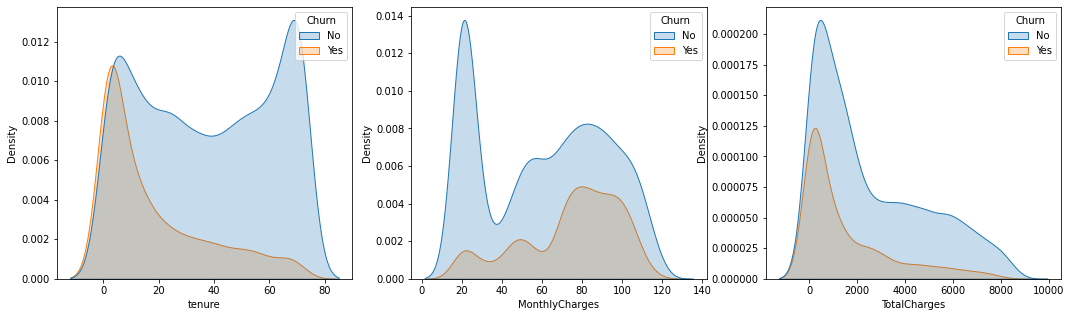

In [ ]:
#Melihat Hubungan Churn dengan Numerical
plt.figure(figsize=(18,5))

for i,col in enumerate(Numerical):    
    plt.subplot(1,3,i + 1)
    ax = sns.kdeplot(x=col, hue="Churn", data=df, shade=True)

Observation:
1. Customer dengan tenure semakin tinggi, semakin jarang untuk churn. Sebaliknya, banyak customer yang churn di bulan pertamanya bergabung dengan perusahaan. Hal ini tentu tidak umum terjadi pada perusahaan, sehingga perusahaan perlu menganalisa lebih lanjut mengenai service yang ditawarkan karena gagal untuk mempertahankan customer baru
2. Kebanyakan customer yang churn adalah customer yang memiliki pembayaran bulanan yang cukup tinggi, yaitu 60 ke atas
3. Total charges memiliki bentuk distribusi yang hampir sama untuk customer yang churn dan tidak churn. Namun, secara nilai, customer yang tidak churn menghasilkan lebih banyak revenue bagi perusahaan

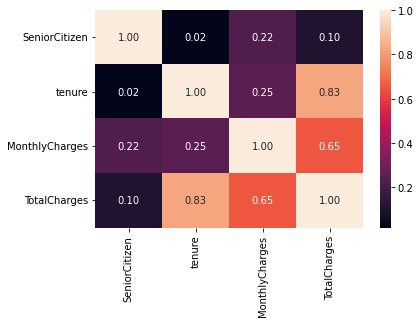

In [ ]:
#Membuat Correlation Heatmap
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

Observation:
1. Dapat disimpulkan bahwa terdapat korelasi yang positif antar variable
2. Korelasi antara tenure dan TotalCharges sangat kuat karena berada di atas 0.8, sedangkan apabila diasumsikan bahwa nilai multikolinearitas di atas 0.85, maka tidak terdapat multikolinearitas antara tenure dan TotalCharges

<Figure size 720x360 with 0 Axes>

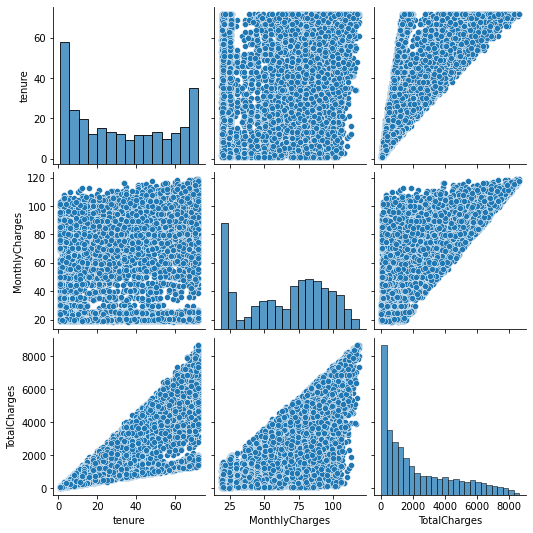

In [ ]:
#Membuat Grafik Pair Plot
plt.figure(figsize = (10,5))
sns.pairplot(df[Numerical])

Observation:
1. Semakin lama customer bergabung dengan perusahaan (tenure), maka revenue yang diterima perusahaan semakin besar (TotalCharges)
2. Customer yang biaya per bulannya semakin mahal (MonthlyCharges) menghasilkan revenue yang semakin besar bagi perusahaan (TotalCharges)

### **Conclusion**
1. Data tidak memiliki masalah yang berarti, hanya terdapat beberapa baris white space. Selain itu, tidak ditemukan adanya missing value, duplicate, ataupun outlier.
2. Untuk tipe data sendiri, data memiliki tipe data categorical dan numerical. Terdapat 2 kolom dengan tipe data yang kurang sesuai, yaitu TotalCharges dan SeniorCitizen.
3. Data dapat dikategorikan berdasarkan kolomnya menjadi categorical user, categorical service, dan categorical account, serta numerical
4. Churn merupakan variabel target yang harus dianalisa
5. Ketiga variabel numerical sangat berguna untuk membantu analisa
6. Data numerical memiliki nilai minimum dan maximum yang make sense untuk masing - masing kolom
7. Berdasarkan analisa di atas, dapat diketahui bahwa terdapat beberapa faktor yang menjadi penyebab customer churn. Penyebab yang paling utama adalah internet service dengan fiber optic. Sebaliknya, customer dengan contract jangka panjang adalah yang paling cenderung untuk tidak churn.
8. Gender, Streaming TV, dan Streaming Movies merupakan variabel yang tidak dapat mengindikasikan adanya churn karena memiliki nilai yang hampir sama antara churn dan tidak churn.
9. Terdapat korelasi yang kuat antara tenure dan Total Charges. Namun, tidak terdapat multikolinearitas. 

### **Perform Deep-Dive Exploration**

##### **Berapa jumlah customer yang join phone service dan internet service berdasarkan tipenya?** 

In [ ]:
customer2in1 = (df
            .groupby(["PhoneService","InternetService"])
            .agg(num_cust=("customerID","count"))
            .reset_index()
            .sort_values("num_cust",ascending=False)
            .head(10)
            )
customer2in1

,PhoneService,InternetService,num_cust
2,Yes,Fiber optic,3096
1,Yes,DSL,1736
3,Yes,No,1520
0,No,DSL,680


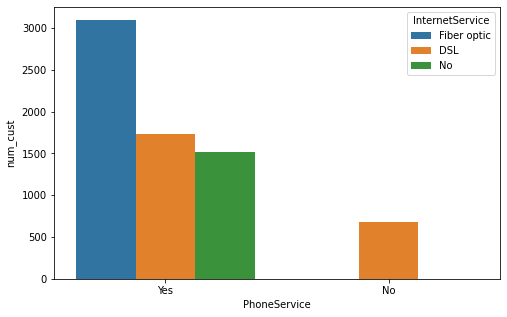

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data=customer2in1, x="PhoneService", y="num_cust", hue="InternetService")
plt.show()

Customer yang tidak bergabung dengan phone service hanya dapat memasang internet DSL, sebanyak 680 customer. Sedangkan customer yang bergabung dengan phone service dapat memilih antara internet fiber optic ataupun DSL. Akan tetapi, sebanyak 3096 customer lebih memilih internet fiber optic, dan sebanyak 1736 customer masih memilih menggunakan DSL. Menjadi PR bagi perusahaan, untuk dapat mendorong sebanyak 1520 customer untuk join internet service. Perusahaan dapat menawarkan bundling package phone service dan internet service untuk menarik customer tersebut. Selain itu, perusahaan juga dapat menawarkan program referral teman untuk mendorong customer yang telah bergabung mengajak orang lain untuk ikut bergabung dengan perusahaan

#####**Berapakah rata - rata pembayaran per bulan per tipe internet service?**

In [ ]:
internet = (df
            .groupby(["InternetService"])
            .agg(mean_internet=("MonthlyCharges","mean"))
            .reset_index()
            .sort_values("mean_internet",ascending=False)
            .head(10)
            )
internet

,InternetService,mean_internet
1,Fiber optic,91.500129
0,DSL,58.088017
2,No,21.076283


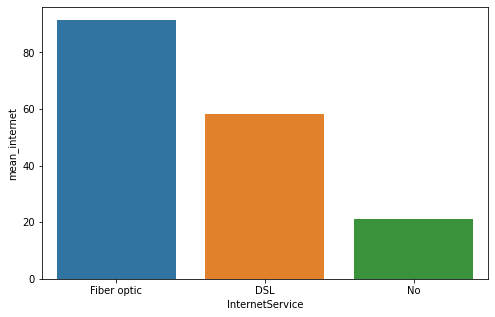

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data=internet, x="InternetService", y="mean_internet")
plt.show()

Fiber optic merupakan internet service dengan biaya termahal dan seperti yang telah diketahui sebelumnya, fiber optic merupakan service dengan tingkat churn tertinggi. Dengan demikian, dapat disimpulkan bahwa salah satu penyebab churn dari customer kemungkinan adalah mahalnya harga per bulan yang harus dibayar customer tidak sebanding dengan service yang ditawarkan (bisa jadi internet lemot/sering error). Oleh karena itu, perusahaan dapat mereview complain yang masuk ataupun melakukan survey pada customer yang relevan.

#####**Berapakah rata - rata pembayaran per bulan per senior citizen dan non senior citizen yang churn dan tidak churn?**

In [ ]:
senior = (df
            .groupby(["SeniorCitizen","Churn"])
            .agg(mean_month=("MonthlyCharges","mean"))
            .reset_index()
            .sort_values("mean_month",ascending=False)
            .head(10)
            )
senior

,SeniorCitizen,Churn,mean_month
3,1,Yes,80.713445
2,1,No,79.182057
1,0,Yes,72.298098
0,0,No,58.660196


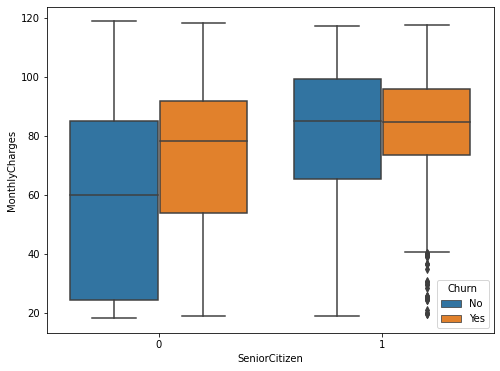

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x = df.SeniorCitizen, y = df.MonthlyCharges, hue = df.Churn)
plt.show()

Rata - rata pembayaran per bulan per user yang diterima dari senior citizen lebih besar daripada non senior citizen. Hal ini kemungkinan disebabkan karena kebanyakan senior citizen adalah orang tua yang lebih sering berada di rumah dan tidak punya banyak kegiatan, sehingga kemungkinan untuk join additional service akan lebih besar. Untuk mempertahankan senior citizen dari churn, dapat ditawarkan diskon special khusus senior citizen atau menambah feature2 yang senior citizen friendly atau channel streaming yang senior citizen friendly